<a href="https://colab.research.google.com/github/plaban1981/Hands-on-Machine-Learning/blob/master/Classification_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Mnist Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [0]:
import sklearn
m = sklearn.datasets.load_digits()

In [4]:
m.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

## Separate Features and Labels

In [5]:
X,y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


784 features ,each image 28 x 28 pixels

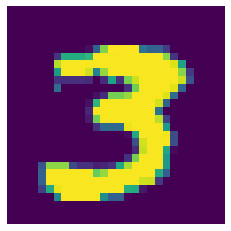

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X[27]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image)
plt.axis('off')
plt.show()


## Train Split the sample data
MNIST is already split into 60000 training samples and 10000 test samples

Training set is already shuffled

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training a Binary Classifier

In [0]:
import numpy as np

In [0]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
y_train_5

array([False, False, False, ..., False, False, False])

In [11]:
X_train.shape

(60000, 784)

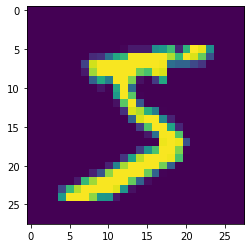

In [12]:
plt.imshow(X_train[np.argmax(y_train_5)].reshape(28,28))

## Stochastic Gradient Descent Classifier - This classifier has the capability of handling very large datasets efficiently.SGD deals with training instances independently - The number of classes has to be greater than one


####SGDClassifier supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. For each of the classes, a binary classifier is learned that discriminates between that and all other classes.

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=2)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predictions = sgd_clf.predict(X_test)

In [15]:
print(y_test[10])
print(predictions[10])

0
0


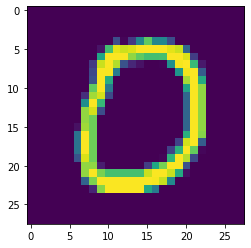

In [16]:
plt.imshow(X_test[10].reshape(28,28))

##Performance Measures

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.7956


##Measuring Accuracy using Cross-Validation

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=23,shuffle=True)
for train_index,test_index in skfolds.split(X_train,y_train):
  clone_clf = clone(sgd_clf)
  x_train_folds = X_train[train_index]
  x_test_folds = X_train[test_index]
  y_train_folds = y_train[train_index]
  y_test_folds = y_train[test_index]
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred = clone_clf.predict(x_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(f'accuracy of predictions {n_correct/len(y_pred)}')

accuracy of predictions 0.85795
accuracy of predictions 0.87895
accuracy of predictions 0.8882


- The StartifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
- At each iteration the code creates a clone of the classifier
- trains the clone on training folds and makes predictions on test folds.
- then it counts the number of correct predictions and outputs the ratio of correct predictions.

## Use cross_val_score() function to evaluate SGDClassifier model using K-fold cross validation with 3 folds

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87355, 0.86865, 0.8742 ])

##DumbClassifier

In [0]:
from sklearn.base import BaseEstimator
class dumbclassifier(BaseEstimator):
  def fit(self,X,y=None):
    pass
  def predict(Self,X):
    return np.zeros((len(X),1),dtype=bool)

In [24]:
never_5_clf = dumbclassifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([1., 1., 1.])

#### The accuracy score is 1 i.e. 100% ,because only 10% of the images are 5, so the classifier will always guess that an image is not 5.

Hence accuracy is generally not always the preferred performance measure for classifiers; especially when dealing with skewed datasets.

##Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.The general idea is to count the number of times instances of class A are classified as class B

In [0]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv=3)

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_train_pred))

[[5647    2   68   13   11   46   48    9   71    8]
 [   2 6438   56   31    6   15   10   16  159    9]
 [  56   65 5119  200   71   25   72   76  250   24]
 [  23   24  213 5273   13  169   26   59  274   57]
 [  24   35   52   18 5190   28   51   41  136  267]
 [ 100   27   67  362   63 4098  134   32  463   75]
 [  41   19  173   24   49   89 5415    3  102    3]
 [  23   27   83   44   48   17    5 5791   57  170]
 [  50  197  116  354   45  210   35   37 4733   74]
 [  34   36   34  129  234   62    2  556  238 4624]]


In [27]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[60000]])